In [18]:
import vanna
from vanna.remote import VannaDefault

In [26]:
api_key = vanna.get_api_key('my_mail')

vanna_model_name = "adventure_works_poc"
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

# Training
You only need to train once. Do not train again unless you want to add more training data.

In [27]:
vn.connect_to_postgres("localhost","Adventureworks","postgres","postgres",5432)

In [28]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
vn.train(plan=plan)

# Ask questions

SELECT SUM(salestotal)
FROM sales.vsalespersonsalesbyfiscalyearsdata


,sum
0,78490296.6918


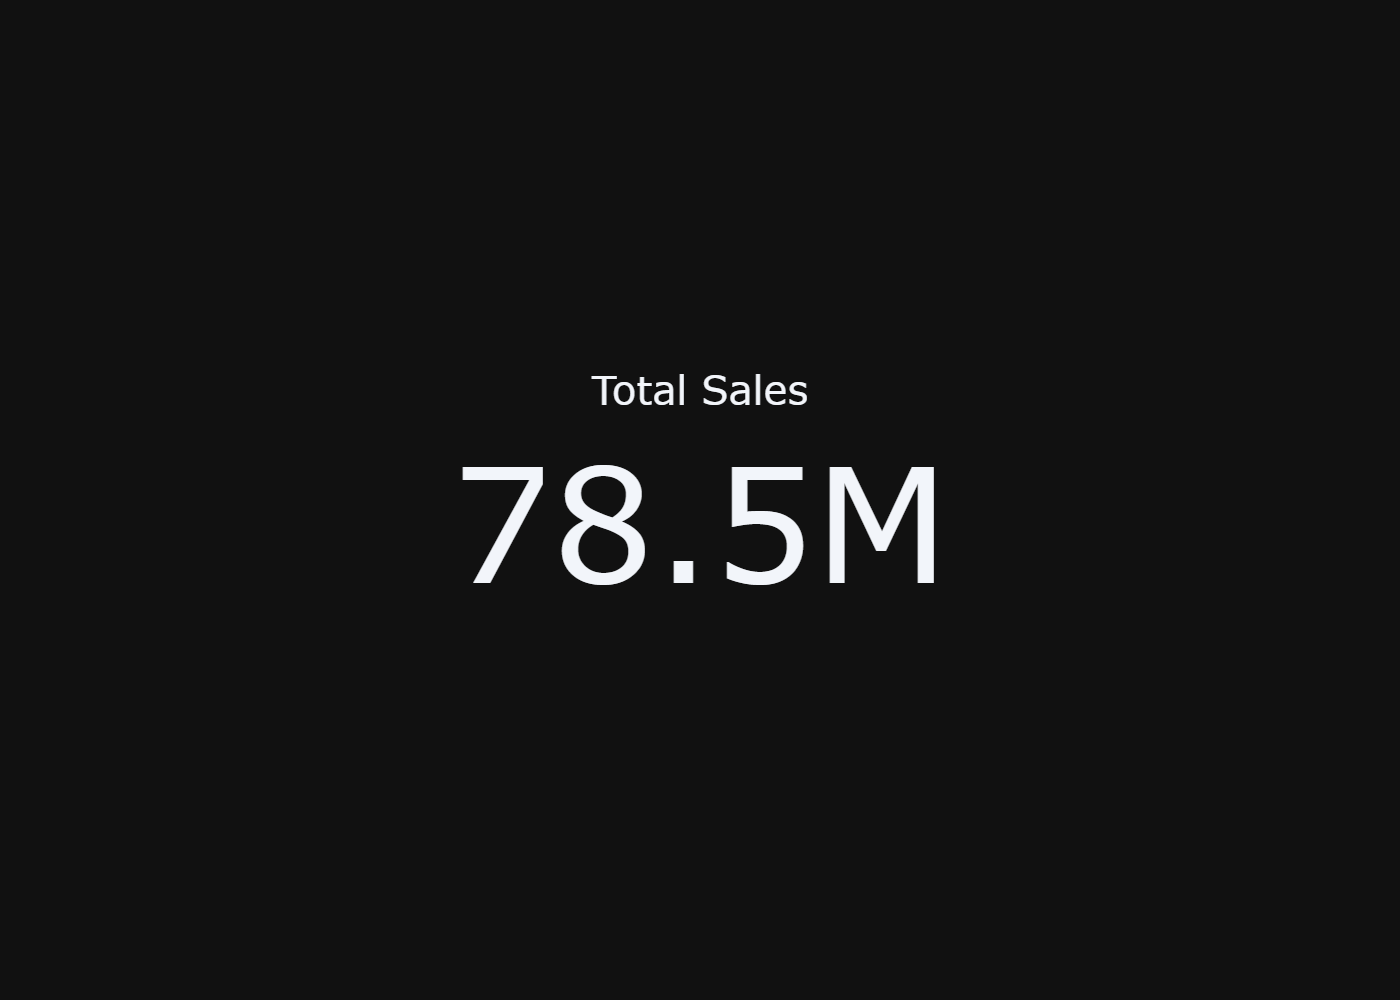

In [36]:
# vn.ask("What it is the middlename of Terri Duffy?")
# vn.ask("What job has Terri Duffy?")
vn.ask("What is the total sales?")


In [37]:
vn.ask("What is the total profit")


SELECT SUM(salesytd - totalcost) AS total_profit
FROM sales.salesperson


ValidationError: column "totalcost" does not exist
LINE 1: SELECT SUM(salesytd - totalcost) AS total_profit
                              ^


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


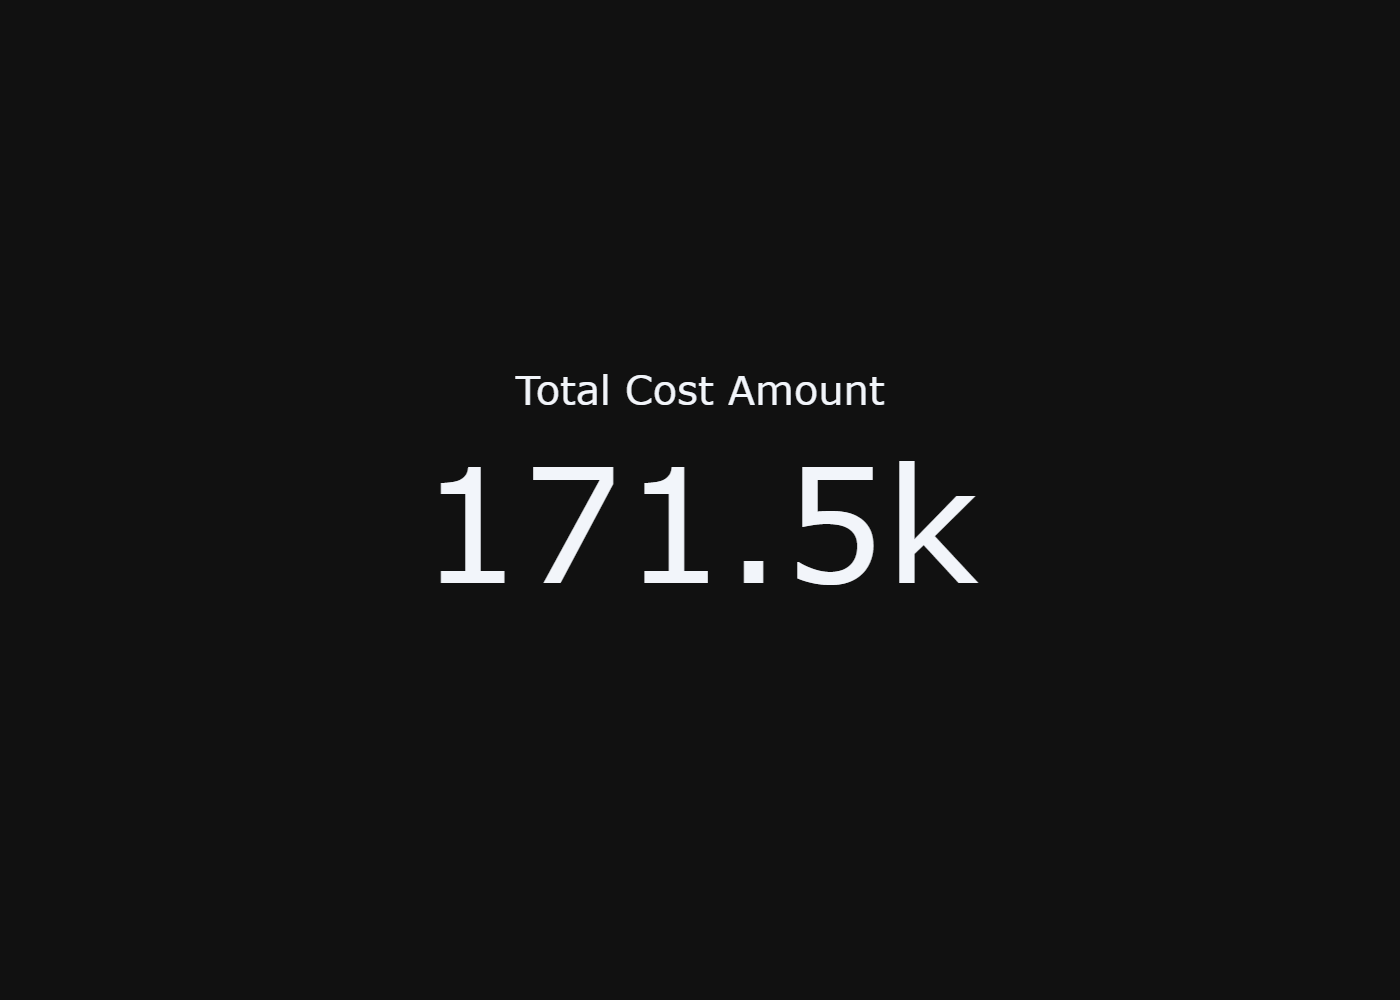

In [38]:
vn.ask("What is the total cost amount")


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


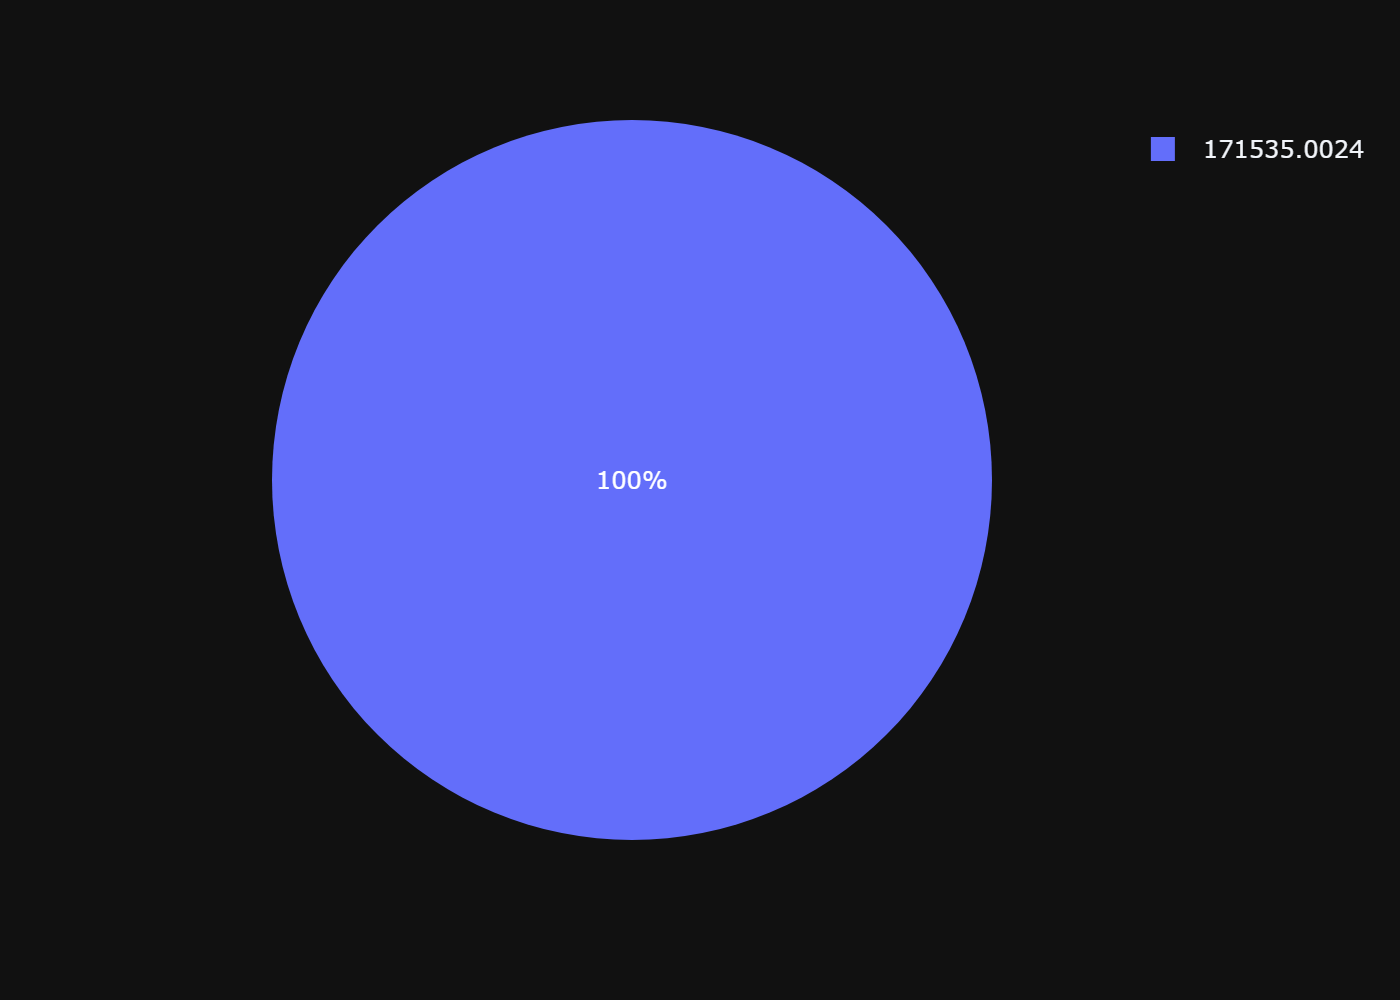

In [39]:
vn.ask("What is the total cost amount")


SELECT SUM(standardcost)
FROM production.productcosthistory


,sum
0,171535.0024


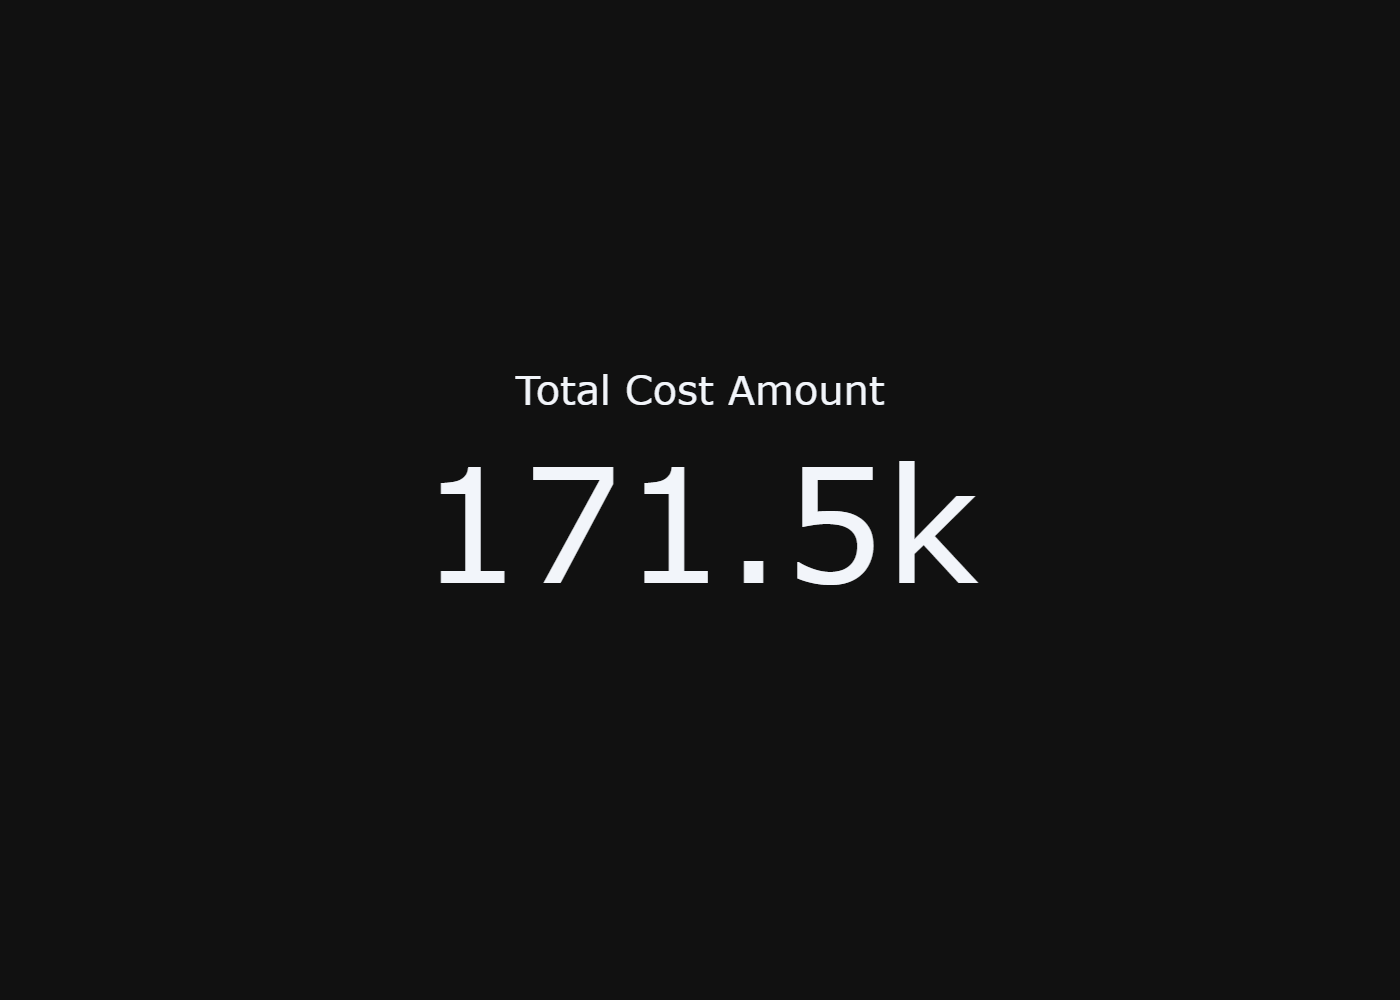

In [40]:
vn.ask("What is the total cost amount")


SELECT AVG(salestotal)
FROM sales.vsalespersonsalesbyfiscalyearsdata


,avg
0,1635214.514412500000


<string>:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



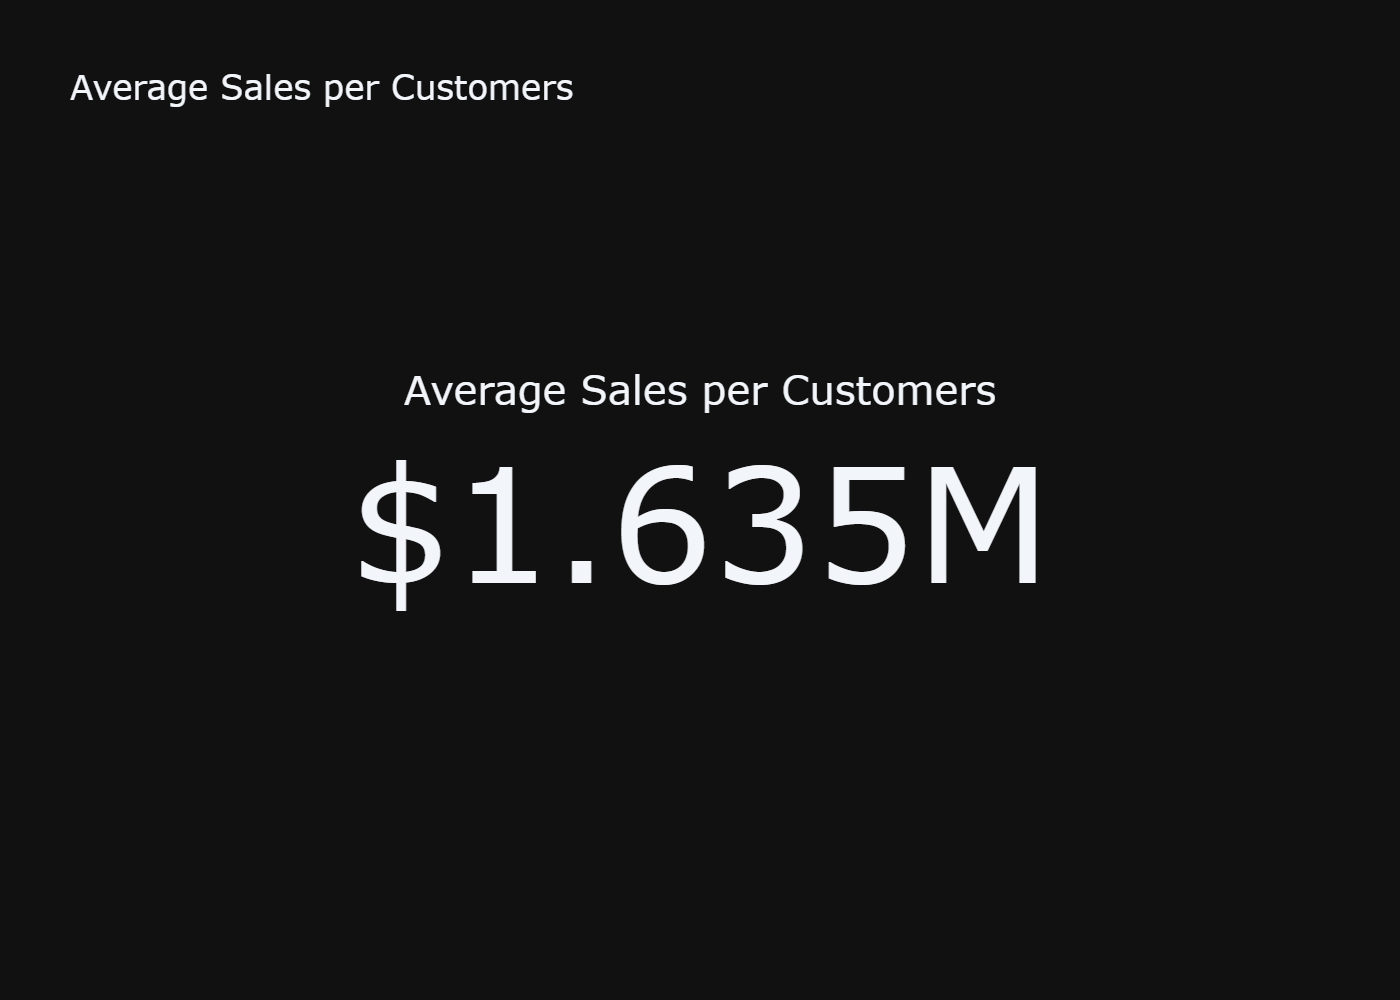

In [41]:
vn.ask("What is the average sales per customers")


SELECT pc.name AS category_name, COUNT(p.productid) AS product_count
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name


,category_name,product_count
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


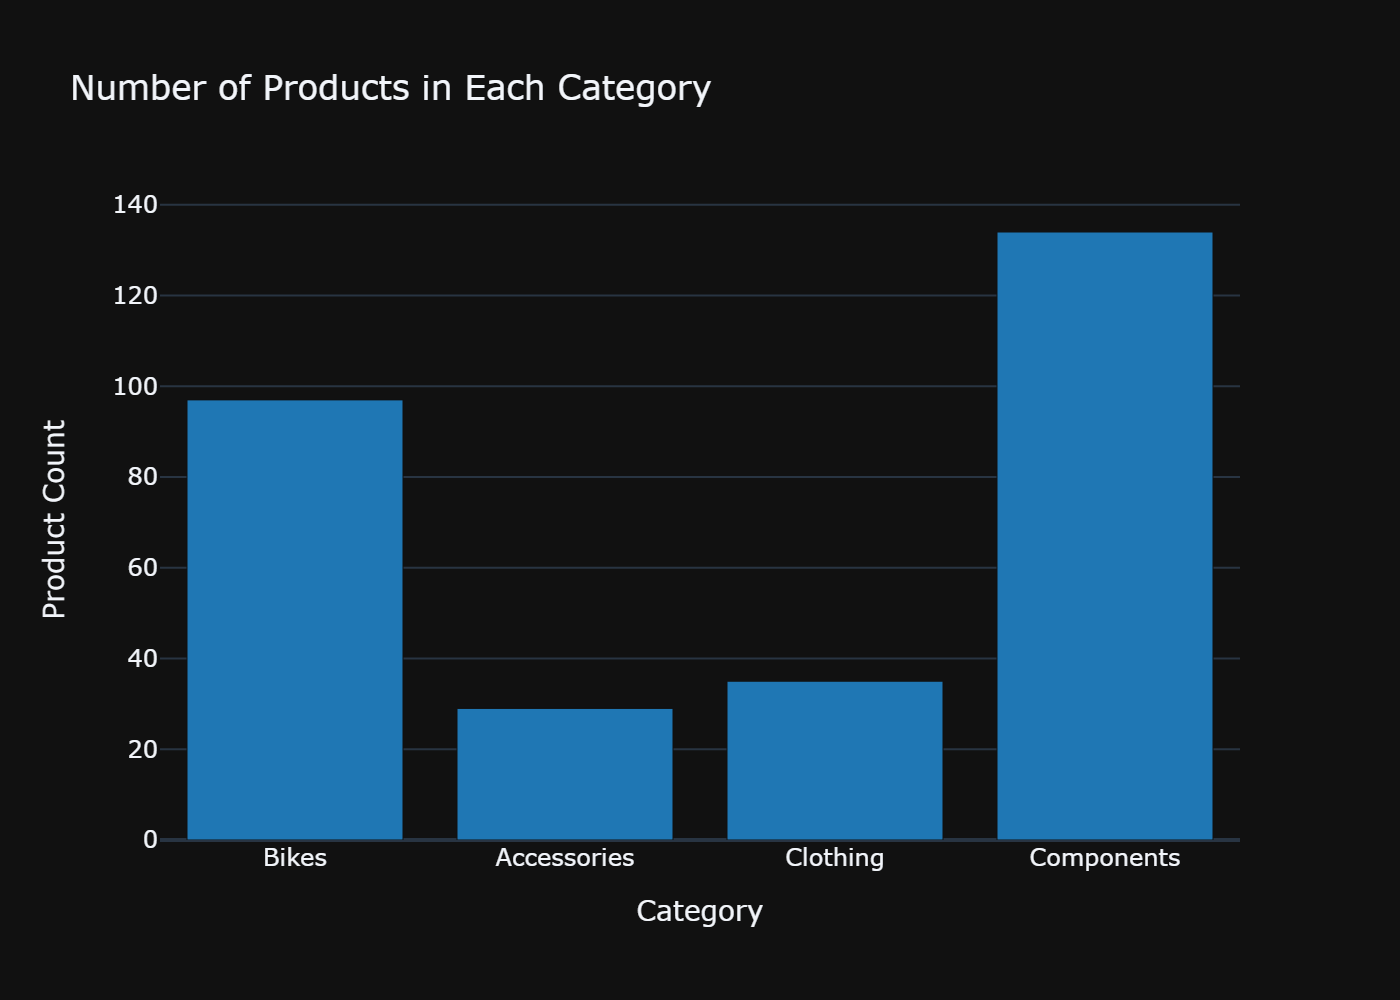

In [43]:
vn.ask("What is the number of products in each category")


SELECT pc.name AS category_name, COUNT(p.productid) AS product_count
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name


,category_name,product_count
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


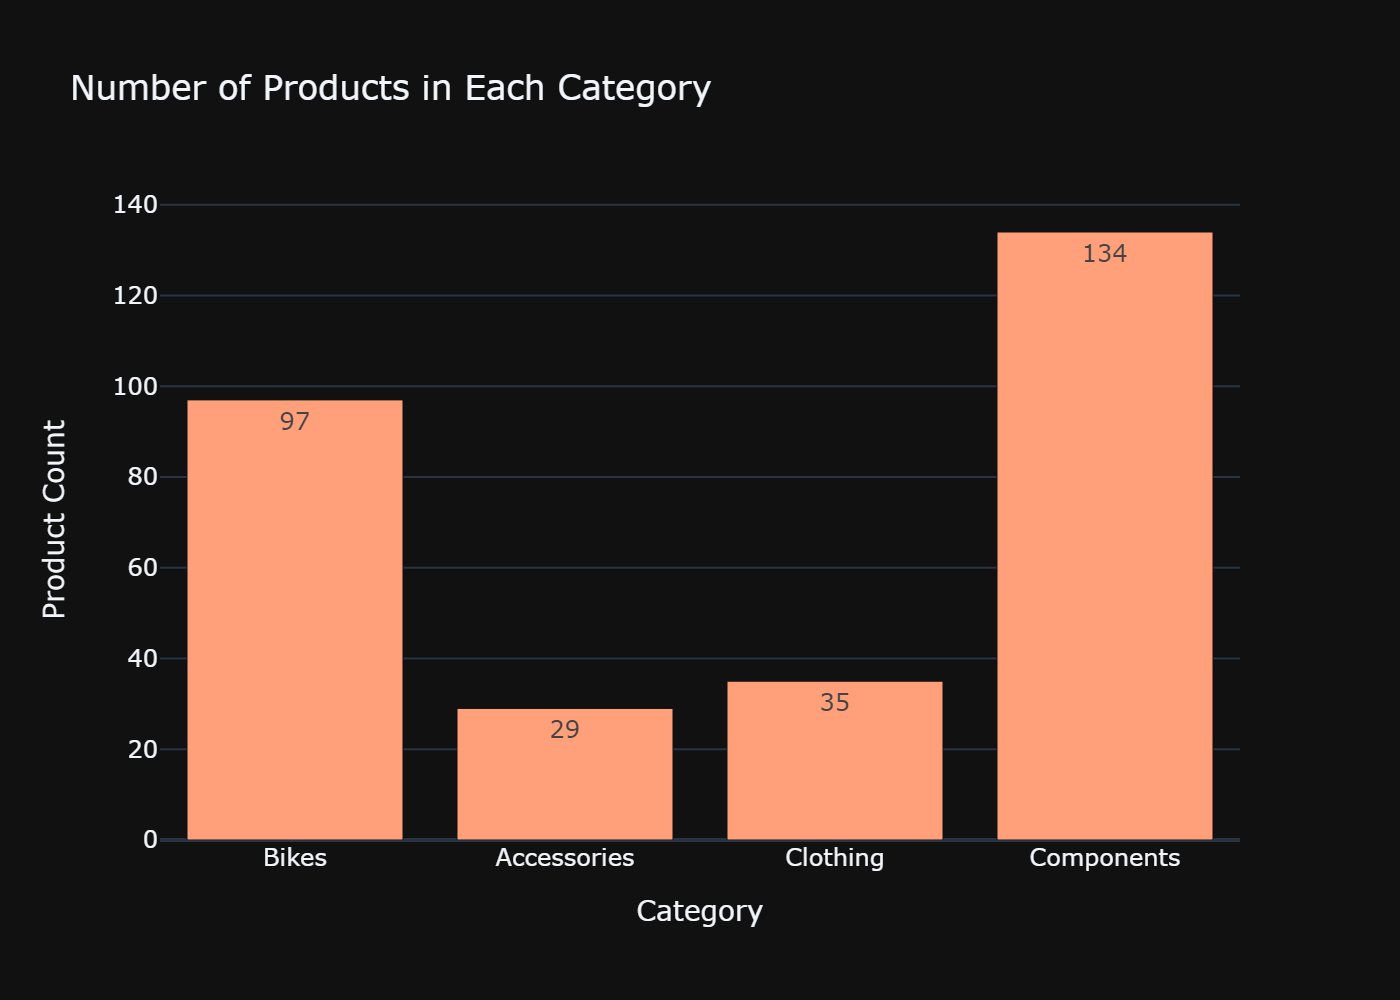

In [46]:
vn.ask("What is the number of products in each category")


SELECT c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(po.subtotal) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_purchase DESC
LIMIT 10


,customerid,personid,storeid,territoryid,rowguid,modifieddate,total_purchase


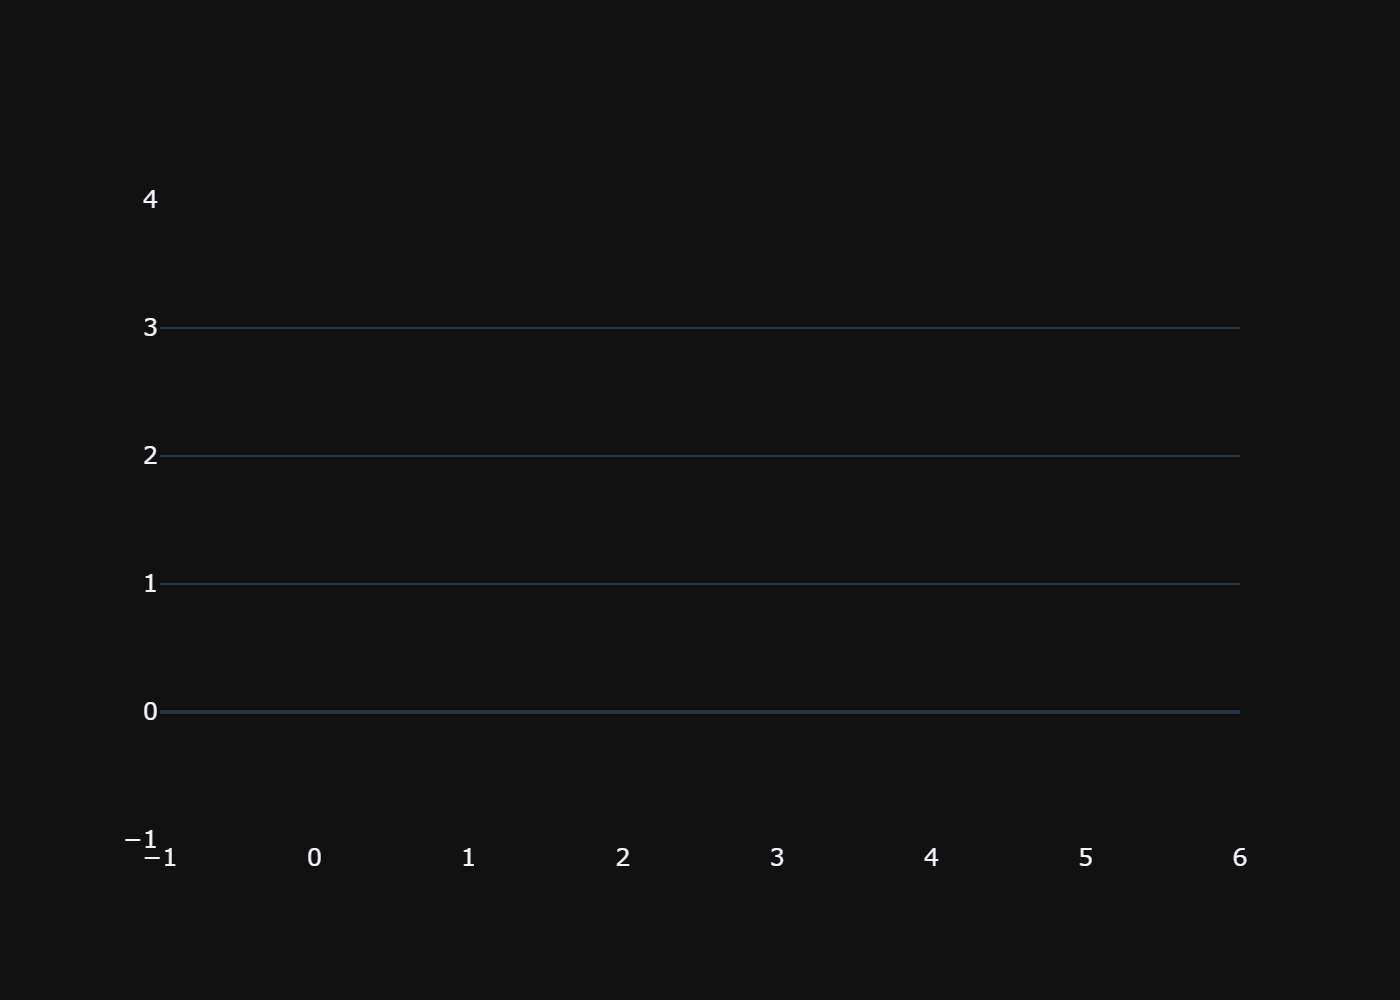

In [48]:
vn.ask("Top 10 Customers with the highest purchase")


In [49]:
vn.ask("Top 10 Customers with the highest purchase")


SELECT c.customerid, c.firstname, c.lastname, SUM(po.totaldue) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.firstname, c.lastname
ORDER BY total_purchase DESC
LIMIT 10


ValidationError: column c.firstname does not exist
LINE 1: SELECT c.customerid, c.firstname, c.lastname, SUM(po.totaldu...
                             ^


In [50]:
vn.ask("Top 10 Customers with the highest purchase")


SELECT TOP 10 c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(po.subtotal) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_purchase DESC


ValidationError: syntax error at or near "10"
LINE 1: SELECT TOP 10 c.customerid, c.personid, c.storeid, c.territo...
                   ^


SELECT e.businessentityid, p.firstname, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,lastname,total_sales
0,276,Linda,Mitchell,10367007.4265
1,277,Jillian,Carson,10065803.5404
2,275,Michael,Blythe,9293903.0046
3,289,Jae,Pak,8503338.6457
4,279,Tsvi,Reiter,7171012.7501
5,281,Shu,Ito,6427005.5540
6,282,José,Saraiva,5926418.3555
7,290,Ranjit,Varkey Chudukatil,4509888.9311
8,283,David,Campbell,3729945.3490
9,278,Garrett,Vargas,3609447.2148


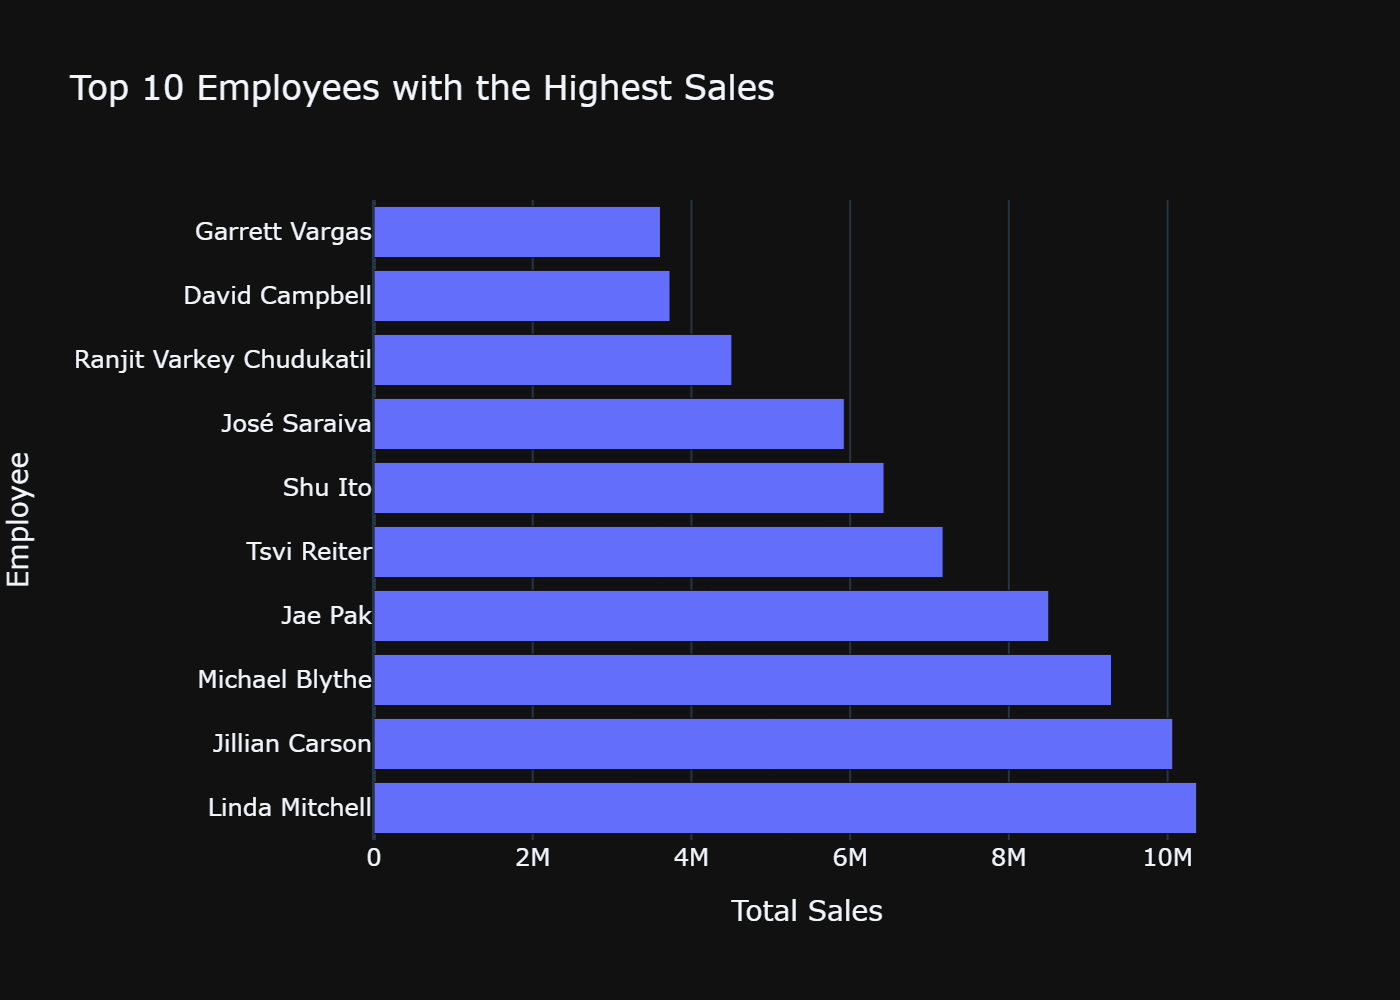

In [51]:
vn.ask("Top 10 Employees with the highest sale")


In [52]:
vn.ask("Top 10 most sale products")


SELECT p.name AS product_name, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN production.product p ON s.productid = p.productid
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 10


ValidationError: column s.productid does not exist
LINE 3: JOIN production.product p ON s.productid = p.productid
                                     ^
HINT:  Perhaps you meant to reference the column "p.productid".


In [53]:
vn.ask("Top 10 most sale products")


SELECT p.name, SUM(s.salestotal) AS total_sales
FROM sales.vproductssales s
JOIN production.product p ON s.productid = p.productid
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 10


ValidationError: relation "sales.vproductssales" does not exist
LINE 2: FROM sales.vproductssales s
             ^


SELECT e.businessentityid, p.firstname, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,lastname,total_sales
0,276,Linda,Mitchell,10367007.4265
1,277,Jillian,Carson,10065803.5404
2,275,Michael,Blythe,9293903.0046
3,289,Jae,Pak,8503338.6457
4,279,Tsvi,Reiter,7171012.7501
5,281,Shu,Ito,6427005.5540
6,282,José,Saraiva,5926418.3555
7,290,Ranjit,Varkey Chudukatil,4509888.9311
8,283,David,Campbell,3729945.3490
9,278,Garrett,Vargas,3609447.2148


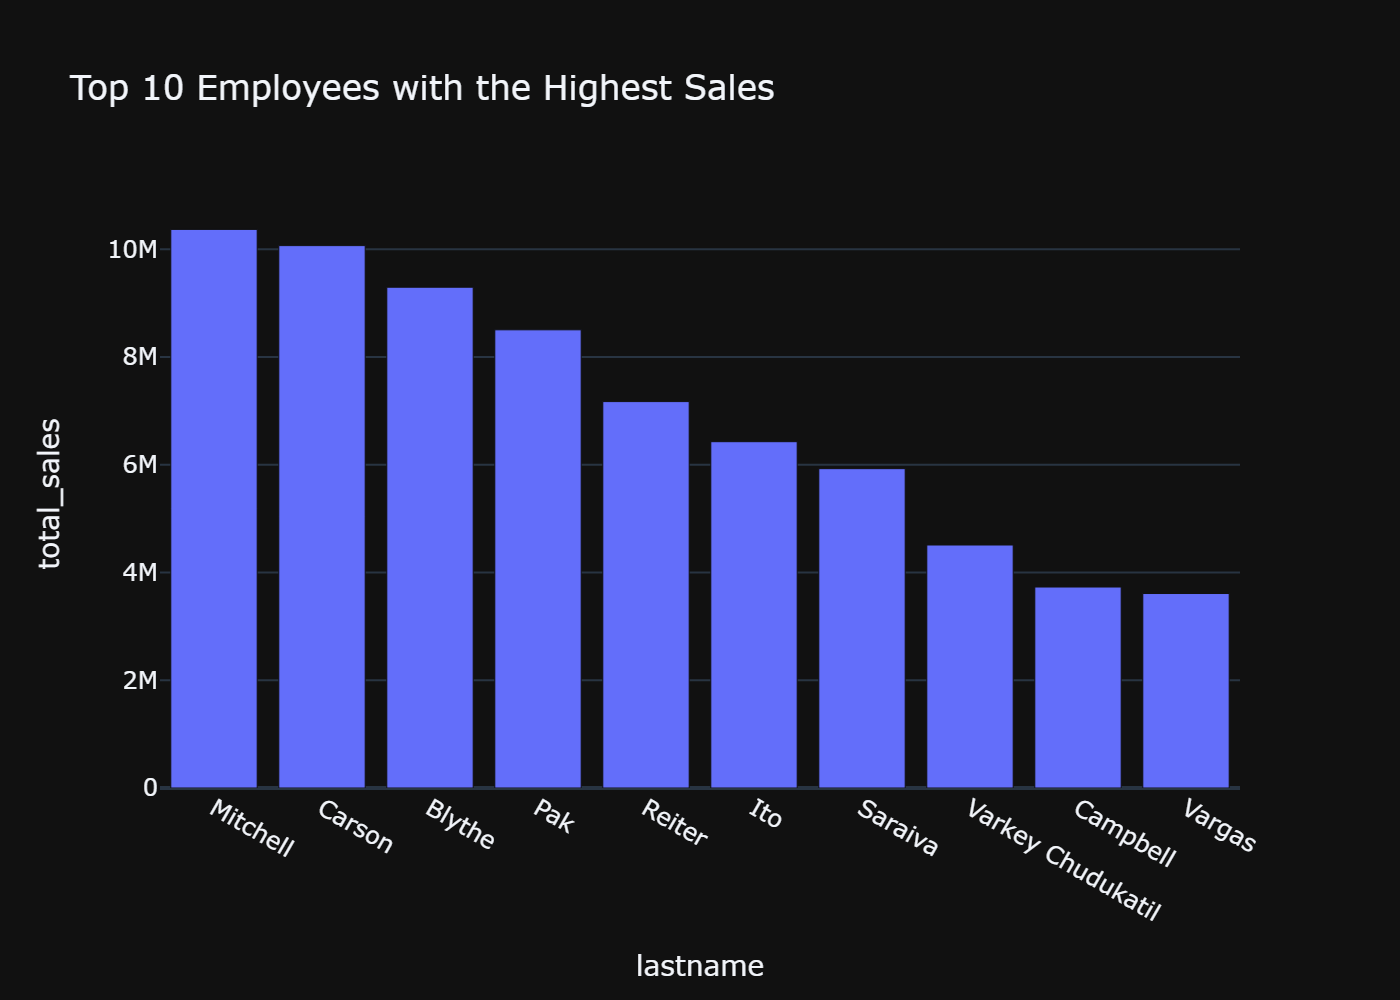

SELECT e.businessentityid, p.firstname, p.middlename, p.lastname, SUM(s.salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
GROUP BY e.businessentityid, p.firstname, p.middlename, p.lastname
ORDER BY total_sales DESC
LIMIT 10


,businessentityid,firstname,middlename,lastname,total_sales
0,276,Linda,C,Mitchell,10367007.4265
1,277,Jillian,None,Carson,10065803.5404
2,275,Michael,G,Blythe,9293903.0046
3,289,Jae,B,Pak,8503338.6457
4,279,Tsvi,Michael,Reiter,7171012.7501
5,281,Shu,K,Ito,6427005.5540
6,282,José,Edvaldo,Saraiva,5926418.3555
7,290,Ranjit,R,Varkey Chudukatil,4509888.9311
8,283,David,R,Campbell,3729945.3490
9,278,Garrett,R,Vargas,3609447.2148


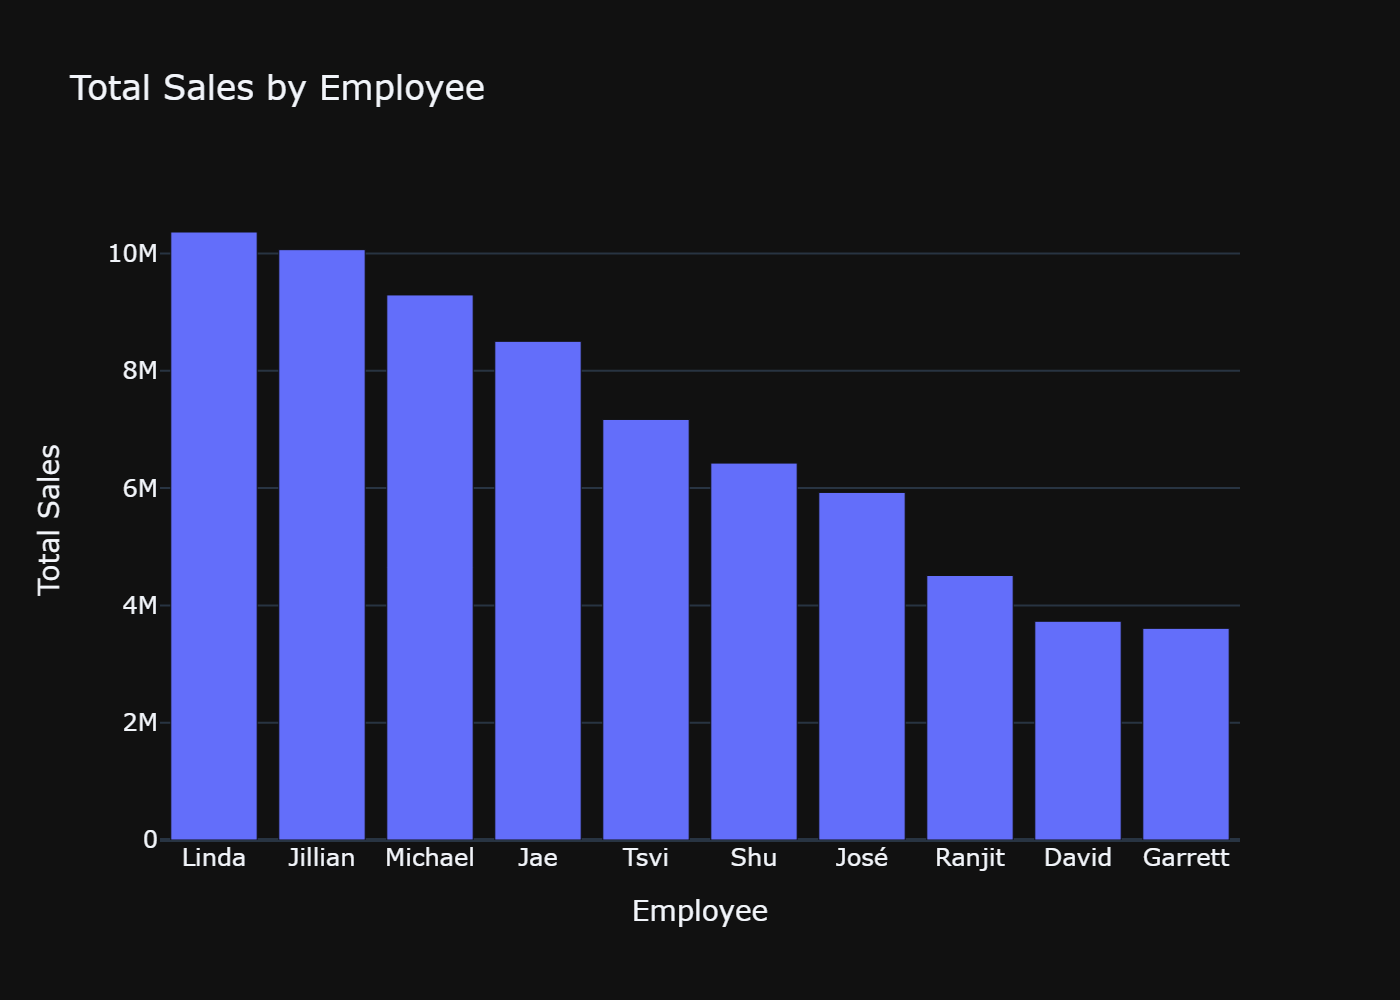

SELECT e.businessentityid, p.firstname, p.lastname, a.addressline1, a.addressline2, a.city, sp.name AS state_province, cr.name AS country_region
FROM sales.vsalespersonsalesbyfiscalyearsdata s
JOIN humanresources.employee e ON s.salespersonid = e.businessentityid
JOIN person.person p ON e.businessentityid = p.businessentityid
JOIN person.businessentityaddress bea ON e.businessentityid = bea.businessentityid
JOIN pe.a a ON bea.addressid = a.addressid
JOIN person.stateprovince sp ON a.stateprovinceid = sp.stateprovinceid
JOIN person.countryregion cr ON sp.countryregioncode = cr.countryregioncode
ORDER BY s.salestotal DESC
LIMIT 10


,businessentityid,firstname,lastname,addressline1,addressline2,city,state_province,country_region
0,289,Jae,Pak,Downshire Way,None,Cambridge,England,United Kingdom
1,276,Linda,Mitchell,2487 Riverside Drive,None,Nevada,Utah,United States
2,277,Jillian,Carson,80 Sunview Terrace,None,Duluth,Minnesota,United States
3,275,Michael,Blythe,8154 Via Mexico,None,Detroit,Michigan,United States
4,277,Jillian,Carson,80 Sunview Terrace,None,Duluth,Minnesota,United States
5,289,Jae,Pak,Downshire Way,None,Cambridge,England,United Kingdom
6,276,Linda,Mitchell,2487 Riverside Drive,None,Nevada,Utah,United States
7,275,Michael,Blythe,8154 Via Mexico,None,Detroit,Michigan,United States
8,279,Tsvi,Reiter,8291 Crossbow Way,None,Memphis,Tennessee,United States
9,276,Linda,Mitchell,2487 Riverside Drive,None,Nevada,Utah,United States


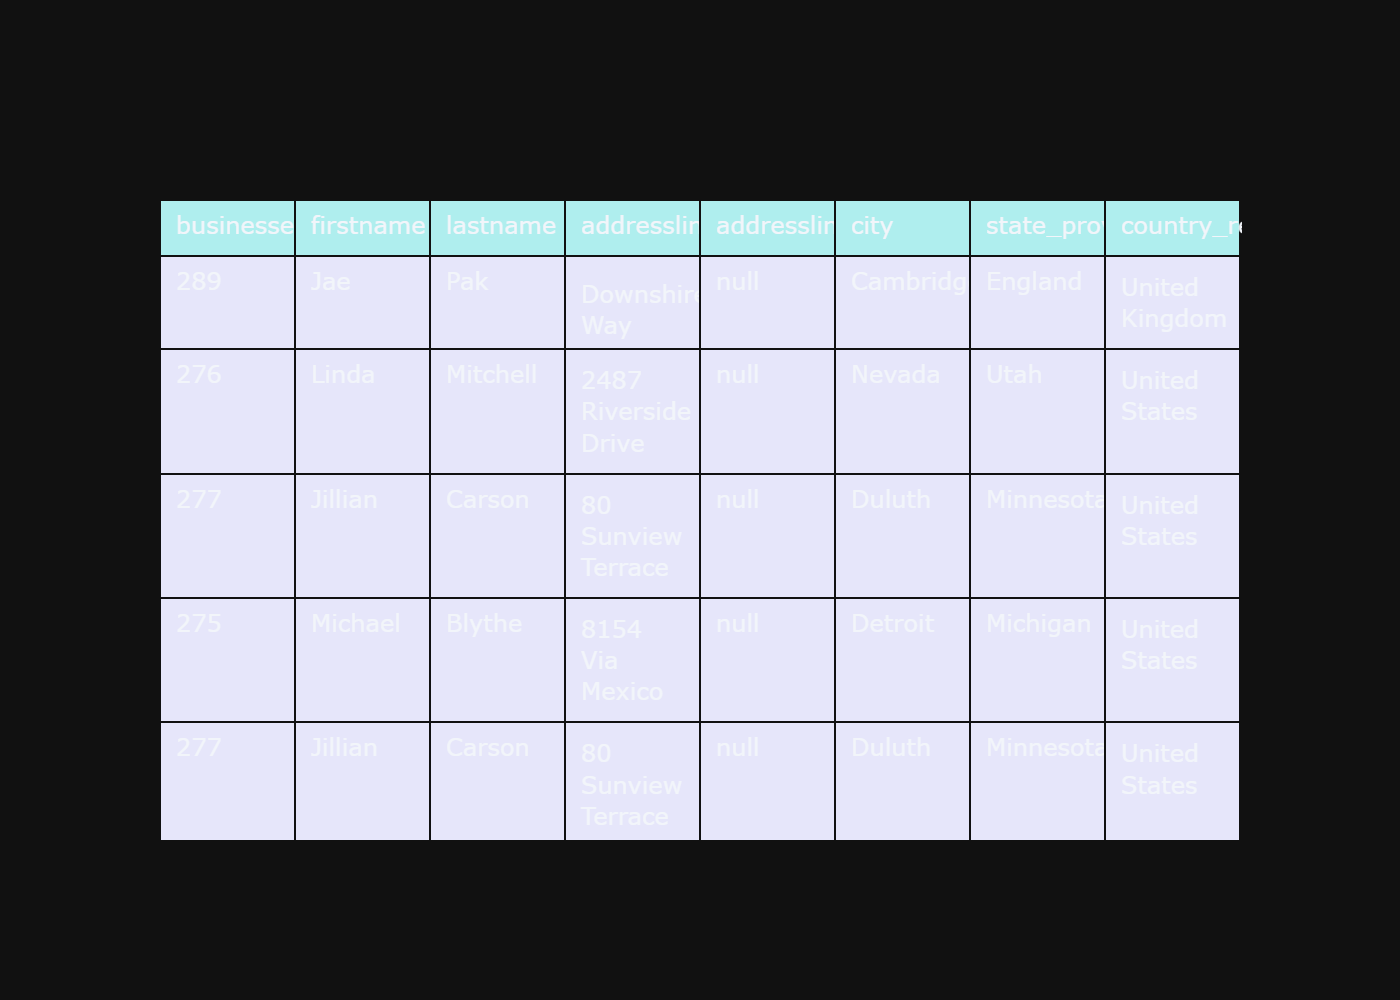

SELECT pc.name AS category_name, COUNT(p.productid) AS product_count, e.emailaddress
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
JOIN person.emailaddress e ON p.productid = e.businessentityid
GROUP BY pc.name, e.emailaddress


,category_name,product_count,emailaddress
0,Components,1,patricia0@adventure-works.com
1,Bikes,1,abigail0@adventure-works.com
2,Accessories,1,carla1@adventure-works.com
3,Components,1,marlin0@adventure-works.com
4,Components,1,dorothy1@adventure-works.com
...,...,...,...
142,Bikes,1,david15@adventure-works.com
143,Bikes,1,mike2@adventure-works.com
144,Components,1,blaine0@adventure-works.com
145,Components,1,rudolph0@adventure-works.com


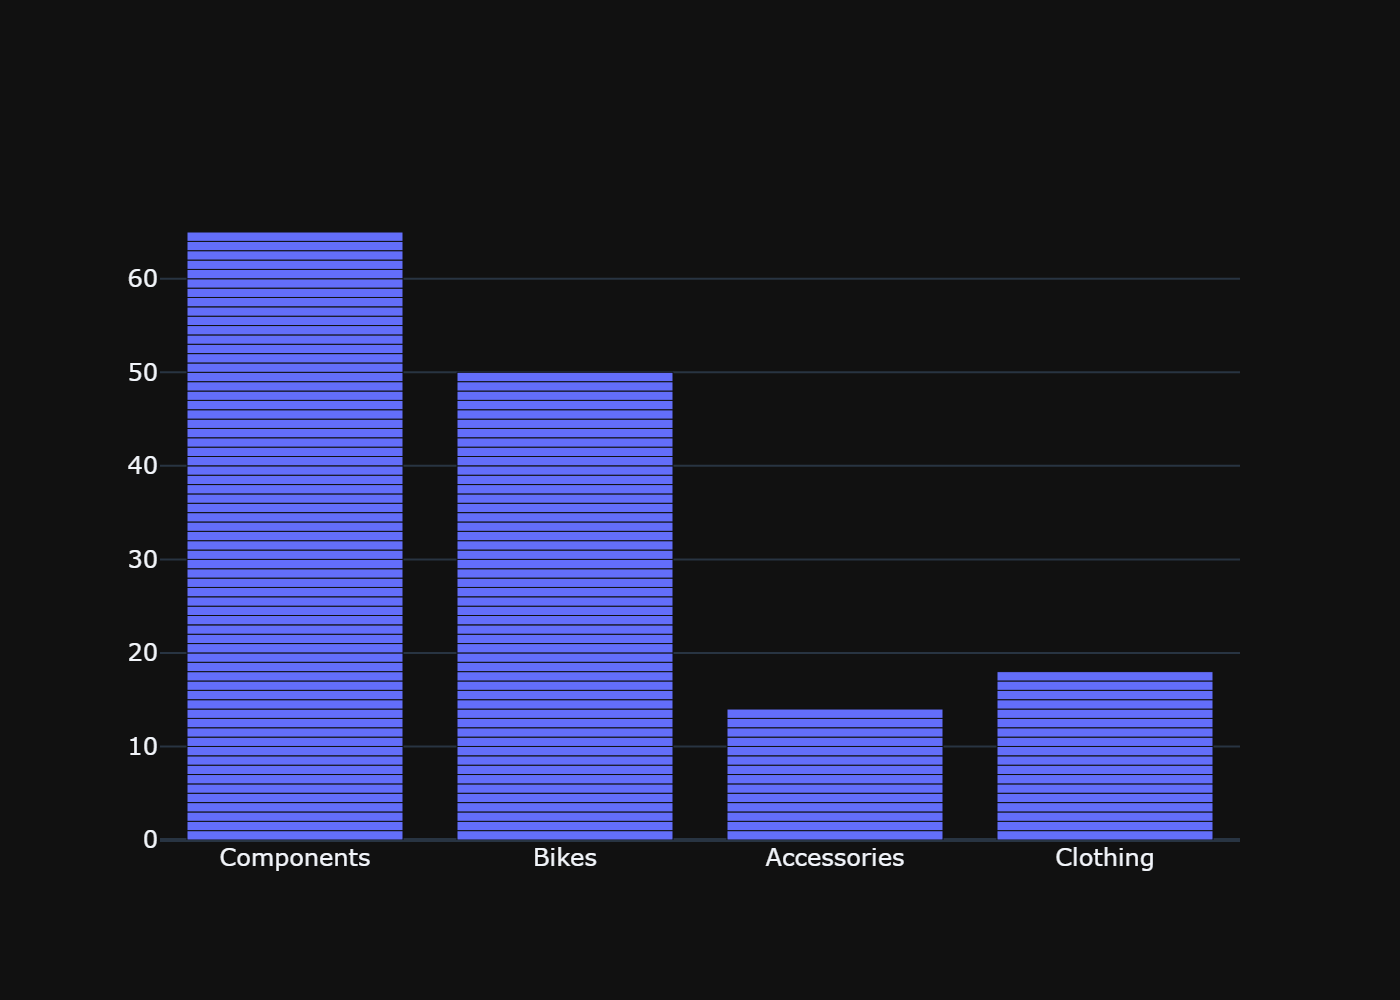

In [58]:
vn.ask("Top 10 Employees with the highest sale")
vn.ask("and what are their middlenames?")
vn.ask("and where they live?")
vn.ask("and what are their emails?")

In [59]:
vn.ask("Ranking customers by sales")

SELECT customerid, SUM(salestotal) AS total_sales
FROM sales.vsalespersonsalesbyfiscalyearsdata
GROUP BY customerid
ORDER BY total_sales DESC


ValidationError: column "customerid" does not exist
LINE 1: SELECT customerid, SUM(salestotal) AS total_sales
               ^


SELECT c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(s.salestotal) AS total_sales
FROM sales.customer c
JOIN sales.vsalespersonsalesbyfiscalyearsdata s ON c.customerid = s.salespersonid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_sales DESC


,customerid,personid,storeid,territoryid,rowguid,modifieddate,total_sales
0,276,None,1932,4,09e2cb2a-b0ca-4376-abe7-e9240ead2c16,2014-09-12 11:15:07.263,10367007.4265
1,277,None,950,4,37156292-0d92-4f6b-9014-ccb0b29e9f9a,2014-09-12 11:15:07.263,10065803.5404
2,275,None,614,4,68dc7932-128e-47cc-80cb-cf2b1a352f3c,2014-09-12 11:15:07.263,9293903.0046
3,289,None,498,1,a42d0f51-c2bc-433d-b2bd-61c516296669,2014-09-12 11:15:07.263,8503338.6457
4,279,None,1930,5,27670fe7-9beb-496c-a0b4-a097acefecd0,2014-09-12 11:15:07.263,7171012.7501
5,281,None,618,6,b3b07166-1798-41b4-a7c2-0579292008c4,2014-09-12 11:15:07.263,6427005.5540
6,282,None,1928,6,cf04f255-d817-4ec9-9d99-4580b1ed0ce2,2014-09-12 11:15:07.263,5926418.3555
7,290,None,762,1,d0dcde2d-8c38-48fc-9d83-5ebe8a8577ae,2014-09-12 11:15:07.263,4509888.9311
8,283,None,946,7,7502406d-db42-4f26-9c7c-384116a6882d,2014-09-12 11:15:07.263,3729945.3490
9,278,None,616,5,e8544bb9-7d68-4d07-96d2-7772d3a000ce,2014-09-12 11:15:07.263,3609447.2148


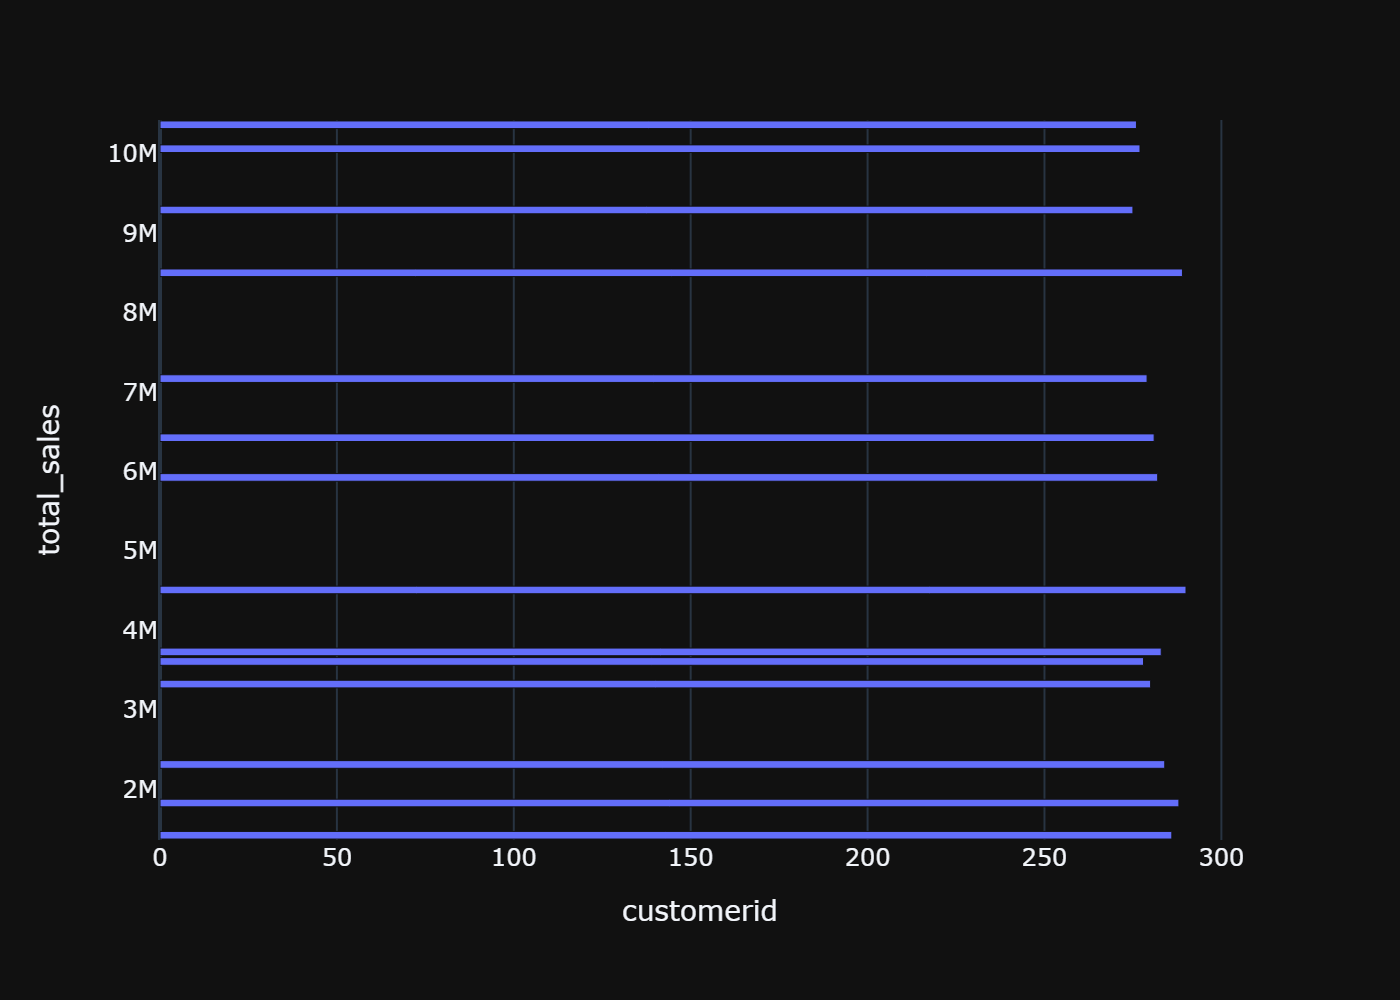

In [60]:
vn.ask("Ranking customers by sales")

SELECT c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate, SUM(s.salestotal) AS total_sales
FROM sales.customer c
JOIN sales.vsalespersonsalesbyfiscalyearsdata s ON c.customerid = s.salespersonid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid, c.rowguid, c.modifieddate
ORDER BY total_sales DESC


,customerid,personid,storeid,territoryid,rowguid,modifieddate,total_sales
0,276,None,1932,4,09e2cb2a-b0ca-4376-abe7-e9240ead2c16,2014-09-12 11:15:07.263,10367007.4265
1,277,None,950,4,37156292-0d92-4f6b-9014-ccb0b29e9f9a,2014-09-12 11:15:07.263,10065803.5404
2,275,None,614,4,68dc7932-128e-47cc-80cb-cf2b1a352f3c,2014-09-12 11:15:07.263,9293903.0046
3,289,None,498,1,a42d0f51-c2bc-433d-b2bd-61c516296669,2014-09-12 11:15:07.263,8503338.6457
4,279,None,1930,5,27670fe7-9beb-496c-a0b4-a097acefecd0,2014-09-12 11:15:07.263,7171012.7501
5,281,None,618,6,b3b07166-1798-41b4-a7c2-0579292008c4,2014-09-12 11:15:07.263,6427005.5540
6,282,None,1928,6,cf04f255-d817-4ec9-9d99-4580b1ed0ce2,2014-09-12 11:15:07.263,5926418.3555
7,290,None,762,1,d0dcde2d-8c38-48fc-9d83-5ebe8a8577ae,2014-09-12 11:15:07.263,4509888.9311
8,283,None,946,7,7502406d-db42-4f26-9c7c-384116a6882d,2014-09-12 11:15:07.263,3729945.3490
9,278,None,616,5,e8544bb9-7d68-4d07-96d2-7772d3a000ce,2014-09-12 11:15:07.263,3609447.2148


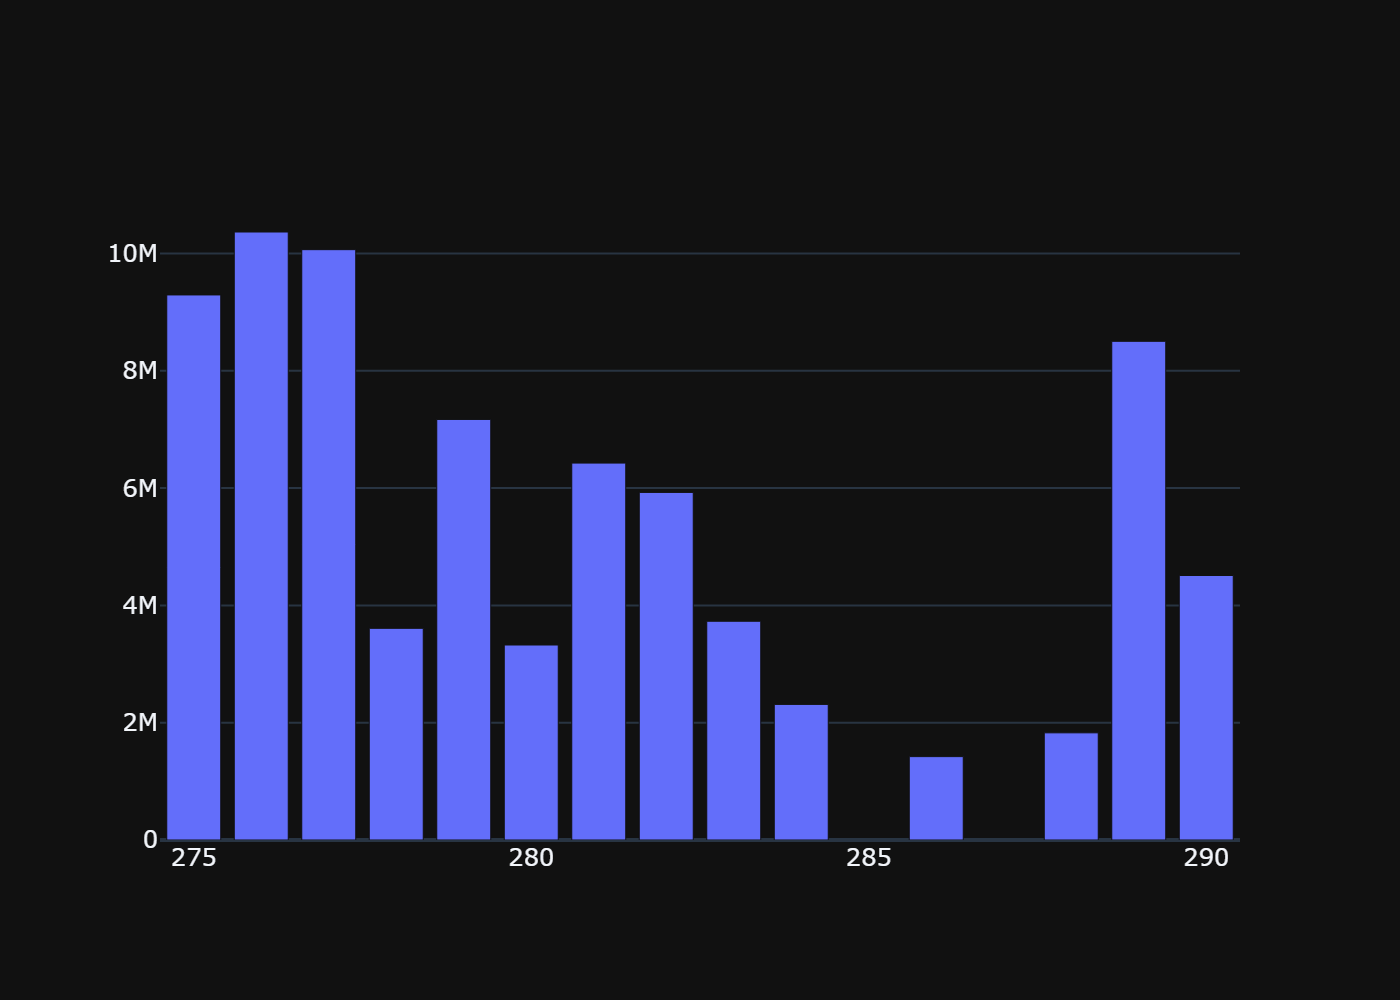

In [61]:
vn.ask("Ranking customers by sales")